# パーセプトロン

パーセプトロンって何?  
以下のようなモデルを考える

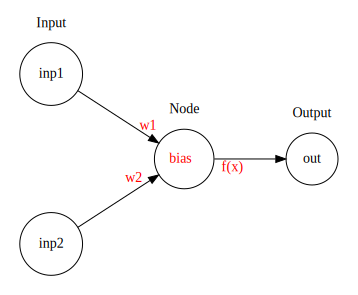

In [35]:
import graphviz
from graphviz import Digraph

dot = Digraph()

# ノードの属性を設定
dot.attr('node', shape='circle')
# エッジの属性を登録
dot.attr('edge', arrowsize='1')
dot.attr('graph', rankdir="LR")
dot.attr(ranksep='1')
dot.attr(nodesep='1.5')
#dot.attr(labelfloat='true')

with dot.subgraph(name='cluster_1') as c:
    c.attr(label='Input')
    c.attr(color='transparent') 
    c.node('inp1')
    c.node('inp2')
with dot.subgraph(name='cluster_2') as c:
    c.attr(label='Node')
    c.attr(color='transparent')  
    c.node('node', label='<<font color="red">bias</font>>')
with dot.subgraph(name='cluster_3') as c:
    c.attr(label='Output')
    c.attr(color='transparent') 
    c.node('out')

dot.edge('inp1', 'node', headlabel='w1', fontcolor='red', labeldistance='2')
dot.edge('inp2', 'node', headlabel='w2', fontcolor='red', labeldistance='2.5')
dot.edge('node', 'out', taillabel='f(x)', fontcolor='red', labeldistance='2')

# レンダリング
dot

上図中の$x$, $f(x)$は下記とする  

$x = inp1 * w1 + inp2 * w2 + bias$  
$f(x) = x > 1の時1, そうでなければ0$ 


ここで$w1$, $w2$, $bias$を下記のように上手く選ぶ  
$w1 = 0.3$  
$w2 = 0.3$  
$bias = -0.5$  

こうするとANDゲートができる。以下確認してみる

In [46]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

# 定数
w1 = 0.3
w2 = 0.3
bias = -0.5

# 入力値と計算結果
inp1 = 0
inp2 = 0
result = step_function(inp1 * w1 + inp2 * w2 + bias)
print('inp1:%d inp2:%d result=%d' % (inp1, inp2, result))

# 入力値と計算結果
inp1 = 1
inp2 = 0
result = step_function(inp1 * w1 + inp2 * w2 + bias)
print('inp1:%d inp2:%d result=%d' % (inp1, inp2, result))

# 入力値と計算結果
inp1 = 0
inp2 = 1
result = step_function(inp1 * w1 + inp2 * w2 + bias)
print('inp1:%d inp2:%d result=%d' % (inp1, inp2, result))

# 入力値と計算結果
inp1 = 1
inp2 = 1
result = step_function(inp1 * w1 + inp2 * w2 + bias)
print('inp1:%d inp2:%d result=%d' % (inp1, inp2, result))


inp1:0 inp2:0 result=0
inp1:1 inp2:0 result=0
inp1:0 inp2:1 result=0
inp1:1 inp2:1 result=1


次にw1, w2, biasを下記のように上手く選ぶ  
$w1 = 0.3$  
$w2 = 0.3$  
$bias = -0.1$  

こうするとORゲートができる。以下確認してみる

In [47]:
# 定数
w1 = 0.3
w2 = 0.3
bias = -0.1

# 入力値と計算結果
inp1 = 0
inp2 = 0
result = step_function(inp1 * w1 + inp2 * w2 + bias)
print('inp1:%d inp2:%d result=%d' % (inp1, inp2, result))

# 入力値と計算結果
inp1 = 1
inp2 = 0
result = step_function(inp1 * w1 + inp2 * w2 + bias)
print('inp1:%d inp2:%d result=%d' % (inp1, inp2, result))

# 入力値と計算結果
inp1 = 0
inp2 = 1
result = step_function(inp1 * w1 + inp2 * w2 + bias)
print('inp1:%d inp2:%d result=%d' % (inp1, inp2, result))

# 入力値と計算結果
inp1 = 1
inp2 = 1
result = step_function(inp1 * w1 + inp2 * w2 + bias)
print('inp1:%d inp2:%d result=%d' % (inp1, inp2, result))


inp1:0 inp2:0 result=0
inp1:1 inp2:0 result=1
inp1:0 inp2:1 result=1
inp1:1 inp2:1 result=1


パラメータによりANDゲートになったりORゲートになれる表現力がある事が分った  
**次回はパラメータをプログラムによって求めたい**